### What kind of data does pandas handle? How do I read and write tabular data?

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

kansas_city = pd.read_csv("data/USW00003947.csv")
kansas_city["Date"] = pd.to_datetime(kansas_city["Date"]) #Thanks skbrimmer!
# st_louis = pd.read_csv("data/USW00013994.csv")
# birmingham = pd.read_csv("data/USW00013876.csv")

### How do I select a subset of a DataFrame?

In [104]:
kc_lows = kansas_city[["Date", "tmin"]]

kc_lows_since2000 = kc_lows[kc_lows["Date"] > "1999-12-31"]
# Limit months to October through end of March, the "operating season."
heating_season = [1, 2, 3, 10, 11, 12]
kc_heat_season_lows = kc_lows_since2000[kc_lows_since2000["Date"].dt.month.isin(heating_season)]

kc_heat_season_lows.set_index("Date", inplace=True)
kc_heat_season_lows

,tmin
Date,
2000-01-01,38.0
2000-01-02,28.0
2000-01-03,28.0
2000-01-04,13.0
2000-01-05,13.0
...,...
2021-12-27,39.0
2021-12-28,23.2
2021-12-29,19.2


### How do I create plots in pandas?

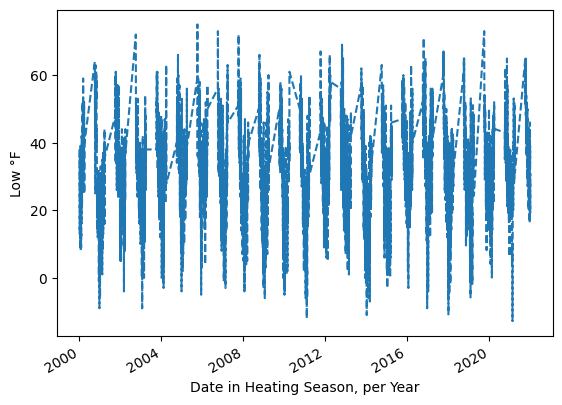

In [105]:
# Create plot with subplots for each city
# kc_heat_season_lows["tmin"].plot(style="--", xlabel="Date in Heating Season, per Year", ylabel="Low \u00b0F")
kc_heat_season_lows["tmin"].plot(style="--", xlabel="Date in Heating Season, per Year", ylabel="Low \u00b0F")
# kc_heat_season_lows["tmin"].ewm(span = 30).mean().plot(style = 'b', label = 'Exponential moving average')
# plt.savefig("low_temperatures.png")
plt.show()

### How to create new columns derived from existing columns

In [106]:
kc_heat_season_lows = kc_lows_since2000[kc_lows_since2000["Date"].dt.month.isin(heating_season)]
kc_heat_season_lows['month'] = pd.to_datetime(kc_heat_season_lows['Date']).dt.month
kc_heat_season_lows

C:\Users\40389\AppData\Local\Temp\ipykernel_7436\2403288461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_heat_season_lows['month'] = pd.to_datetime(kc_heat_season_lows['Date']).dt.month


,Date,tmin,month
40541,2000-01-01,38.0,1
40542,2000-01-02,28.0,1
40543,2000-01-03,28.0,1
40544,2000-01-04,13.0,1
40545,2000-01-05,13.0,1
...,...,...,...
48572,2021-12-27,39.0,12
48573,2021-12-28,23.2,12
48574,2021-12-29,19.2,12
48575,2021-12-30,28.2,12


<Axes: xlabel='month', ylabel='tmin'>

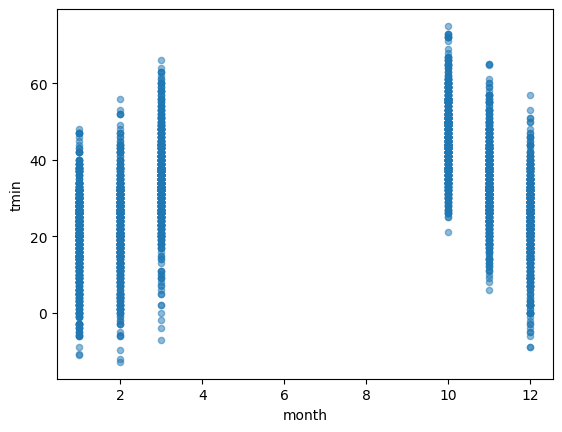

In [107]:
kc_heat_season_lows.plot.scatter(x="month", y="tmin", alpha=0.5)

### How to calculate summary statistics

In [122]:
kc_heat_season_lows.set_index("Date", inplace=True)
kc_heat_season_lows.groupby("month").mean()

KeyError: "None of ['Date'] are in the columns"

### How to handle time series data with ease

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
temperature = pd.read_csv("data/USW00003947.csv")
temperature = temperature.rename(columns={"Date": "datetime"})
temperature.head()

,Unnamed: 0,datetime,tmax,tmin,prcp
0,1,1889-01-01,44.0,19.0,0.0
1,2,1889-01-02,48.0,28.0,0.0
2,3,1889-01-03,52.0,33.0,0.0
3,4,1889-01-04,42.0,31.0,0.0
4,5,1889-01-05,30.0,25.0,0.0


In [125]:
temperature["datetime"] = pd.to_datetime(temperature["datetime"])
temperature["datetime"]

0       1889-01-01
1       1889-01-02
2       1889-01-03
3       1889-01-04
4       1889-01-05
           ...    
48572   2021-12-27
48573   2021-12-28
48574   2021-12-29
48575   2021-12-30
48576   2021-12-31
Name: datetime, Length: 48577, dtype: datetime64[ns]

In [126]:
temperature["datetime"].min(), temperature["datetime"].max()

(Timestamp('1889-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [127]:
temperature["datetime"].max() - temperature["datetime"].min()

Timedelta('48576 days 00:00:00')